In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Data preparation and cleaning
<hr style="border-bottom:1px solid black" />

<h4 style="color:teal">This data was collected from kaggle.com . Data Science Job Salaries Dataset contains 11 columns, each are:</h4>
<ul>
    
<li>work_year: The year the salary was paid.</li>
<li>experience_level: The experience level in the job during the year.</li>
<li>employment_type: The type of employment for the role.</li>
<li>job_title: The role worked in during the year.</li>
<li>salary: The total gross salary amount paid.</li>
<li>salary_currency: The currency of the salary paid as an ISO 4217 currency code.</li>
<li>salaryinusd: The salary in USD.</li>
<li>employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.</li>
<li>remote_ratio: The overall amount of work done remotely.</li>
<li>company_location: The country of the employer's main office or contracting branch.</li>
<li>company_size: The median number of people that worked for the company during the year.</li>
    </ul>

In [2]:
df = pd.read_csv("./../../Datasets/ds_salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### So there are no null values and data types of each column is proper . Hence no change needed.



## Analysis of data
<hr style="border-bottom:1px solid black" />

In [8]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


### Let us see all categorical features pattern

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
job_title = df['job_title'].value_counts()
job_title

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [11]:
#Top 10 job titles
job_title.head(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

In [12]:
job_title.tail(10)

Product Data Scientist                 1
Power BI Developer                     1
Compliance Data Analyst                1
Data Science Tech Lead                 1
Data Management Specialist             1
Principal Machine Learning Engineer    1
Azure Data Engineer                    1
Manager Data Management                1
Marketing Data Engineer                1
Finance Data Analyst                   1
Name: job_title, dtype: int64

In [13]:
employment_type = df['employment_type'].value_counts()
employment_type

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [14]:
salary_currency = df['salary_currency'].value_counts()
salary_currency

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

### Seeing how many data science jobs were there in available year

In [15]:
work_year = df['work_year'].value_counts()
work_year

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

#### With respect to dataset , there is an increase in jobs iin data science year per year

In [16]:
company_location = df['company_location'].value_counts()
company_location

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [17]:
company_location.head(10)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: company_location, dtype: int64

### It seems US has clearly has an edge in terms of data science jobs being available, as per the data

In [18]:
company_location.tail(10)

BO    1
VN    1
AM    1
BA    1
SK    1
MK    1
BS    1
IR    1
CR    1
MT    1
Name: company_location, dtype: int64

In [19]:
location_summary = df.groupby('company_location')['remote_ratio'].agg(['mean', 'count'])
location_summary = location_summary.rename(columns={'mean': 'mean_remote_ratio', 'count': 'location_count'})
location_summary = location_summary.reset_index()
location_summary.set_index('company_location')
location_summary = location_summary.sort_values(by='mean_remote_ratio', ascending=False)
location_summary

,company_location,mean_remote_ratio,location_count
24,EG,100.0,1
13,CF,100.0,2
52,MY,100.0,1
3,AR,100.0,3
53,NG,100.0,5
...,...,...,...
31,HK,0.0,1
32,HN,0.0,1
44,LT,0.0,2
46,LV,0.0,4


### Remote ratio based top jobs data

In [20]:
location_summary.head(20)

,company_location,mean_remote_ratio,location_count
24,EG,100.000000,1
13,CF,100.000000,2
52,MY,100.000000,1
3,AR,100.000000,3
53,NG,100.000000,5
59,PR,100.000000,4
58,PL,100.000000,5
43,KE,100.000000,2
18,CR,100.000000,1
56,PH,100.000000,1


### Based on most jobs , watching remote ratio

In [21]:
location_summary = location_summary.sort_values(by='location_count', ascending=False)

In [22]:
location_summary.head(20)

,company_location,mean_remote_ratio,location_count
70,US,44.440789,3040
28,GB,42.732558,172
12,CA,59.770115,87
25,ES,33.116883,77
38,IN,68.965517,58
20,DE,58.035714,56
27,FR,64.705882,34
10,BR,86.666667,15
60,PT,39.285714,14
6,AU,67.857143,14


In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Assesing company size and jobs

In [24]:
company_size_count = df['company_size'].value_counts()

In [25]:
company_size_count

M    3153
L     454
S     148
Name: company_size, dtype: int64

#### So Medium sized companies have more data science jobs than Large Size company and small companies

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [27]:
company_size_remote_ratio_mean = df.groupby('company_size')['remote_ratio'].mean()

In [28]:
company_size_remote_ratio_mean

company_size
L    60.572687
M    42.990802
S    72.297297
Name: remote_ratio, dtype: float64

### Based on data, Small companies posses better remote ratio

In [29]:
experience_company_salary_mean = df.groupby(['experience_level', 'company_size'])['salary'].mean()

In [30]:
experience_company_salary_mean

experience_level  company_size
EN                L               196071.400000
                  M               176667.491228
                  S               213565.224490
EX                L               623846.153846
                  M               198110.010526
                  S               200833.333333
MI                L               737678.917910
                  M               124738.829308
                  S               469789.180000
SE                L               350949.420290
                  M               153885.334069
                  S               150988.372093
Name: salary, dtype: float64

In [31]:
highest_paying_company_size = experience_company_salary_mean.groupby('experience_level').idxmax()

In [32]:
highest_paying_company_size

experience_level
EN    (EN, S)
EX    (EX, L)
MI    (MI, L)
SE    (SE, L)
Name: salary, dtype: object

<span style="color:green; text-transform:uppercase; font-size:14px"> From the above, we can conclude that Large companies ,pays the most, for majority of experience level, with exception at EN (entry level) that the Small companies pay most</span>

In [33]:
company_size_unique_job_titles = df.groupby('company_size')['job_title'].agg(lambda x: list(set(x)))

company_size_job_title_counts = df.groupby('company_size')['job_title'].nunique()

result_df = pd.DataFrame({
    'Unique_Job_Titles': company_size_unique_job_titles,
    'Unique_Job_Title_Counts': company_size_job_title_counts
})

result_df


,Unique_Job_Titles,Unique_Job_Title_Counts
company_size,,
L,"[Machine Learning Scientist, Cloud Database En...",67
M,"[Machine Learning Scientist, Head of Data, BI ...",72
S,"[Machine Learning Scientist, BI Data Analyst, ...",40


In [34]:
top_5_job_titles_by_company_size = df.groupby('company_size')['job_title'].value_counts().groupby(level=0).nlargest(5)

top_5_job_titles_by_company_size

company_size  company_size  job_title                 
L             L             Data Scientist                 99
                            Data Engineer                  79
                            Data Analyst                   38
                            Machine Learning Engineer      37
                            Applied Scientist              30
M             M             Data Engineer                 953
                            Data Scientist                713
                            Data Analyst                  556
                            Machine Learning Engineer     234
                            Analytics Engineer            101
S             S             Data Scientist                 28
                            Data Analyst                   18
                            Machine Learning Engineer      18
                            Data Engineer                   8
                            Machine Learning Scientist      7
Name: job_title

## Now assessing salaries

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [36]:
# calculating the maximum and minimum salaries by 'experience_level' and 'company_size'
salary_stats = df.groupby(['experience_level', 'company_size'])['salary'].agg(['max', 'min']).reset_index()
salary_stats

,experience_level,company_size,max,min
0,EN,L,2250000,12000
1,EN,M,6600000,8760
2,EN,S,4450000,6000
3,EX,L,6000000,70000
4,EX,M,353200,15000
5,EX,S,416000,59000
6,MI,L,30400000,8000
7,MI,M,2500000,7500
8,MI,S,8500000,18000
9,SE,L,7500000,8000


In [37]:


# Group the data by 'experience_level' and 'company_size' and calculate the maximum and minimum salaries
salary_stats = df.groupby(['experience_level', 'company_size'])['salary'].agg(['max', 'min']).reset_index()

# Create a DataFrame to store job titles corresponding to maximum salaries
max_salary_job_titles = df.loc[df.groupby(['experience_level', 'company_size'])['salary'].idxmax()][['experience_level', 'company_size', 'job_title']]
max_salary_job_titles.rename(columns={'job_title': 'max_salary_job_title'}, inplace=True)

# Create a DataFrame to store job titles corresponding to minimum salaries
least_salary_job_titles = df.loc[df.groupby(['experience_level', 'company_size'])['salary'].idxmin()][['experience_level', 'company_size', 'job_title']]
least_salary_job_titles.rename(columns={'job_title': 'least_salary_job_title'}, inplace=True)

# Merge the two DataFrames to add the max_salary_job_title and least_salary_job_title columns
salary_stats = pd.merge(salary_stats, max_salary_job_titles, on=['experience_level', 'company_size'], how='left')
salary_stats = pd.merge(salary_stats, least_salary_job_titles, on=['experience_level', 'company_size'], how='left')

# Display the result
salary_stats


,experience_level,company_size,max,min,max_salary_job_title,least_salary_job_title
0,EN,L,2250000,12000,Data Engineer,Data Engineer
1,EN,M,6600000,8760,Data Scientist,Data Analyst
2,EN,S,4450000,6000,Data Engineer,AI Developer
3,EX,L,6000000,70000,Head of Machine Learning,Data Engineer
4,EX,M,353200,15000,Director of Data Science,Staff Data Analyst
5,EX,S,416000,59000,Principal Data Scientist,Data Science Consultant
6,MI,L,30400000,8000,Data Scientist,Data Analyst
7,MI,M,2500000,7500,Data Scientist,Analytics Engineer
8,MI,S,8500000,18000,ML Engineer,Big Data Engineer
9,SE,L,7500000,8000,Lead Machine Learning Engineer,Product Data Scientist


## Sharing stage - Visualisation

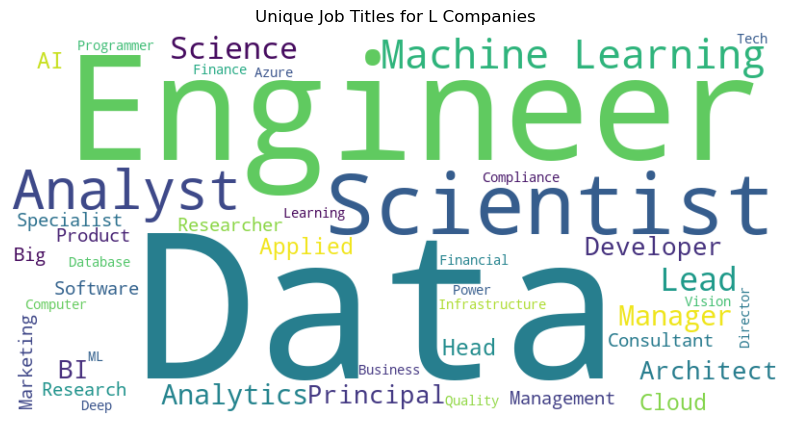

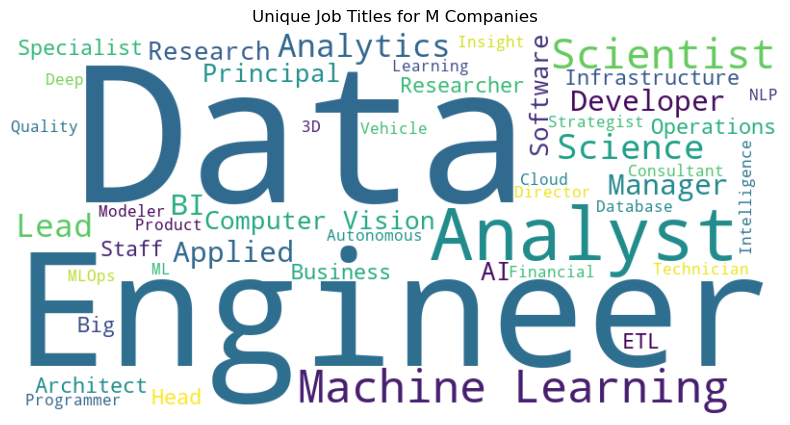

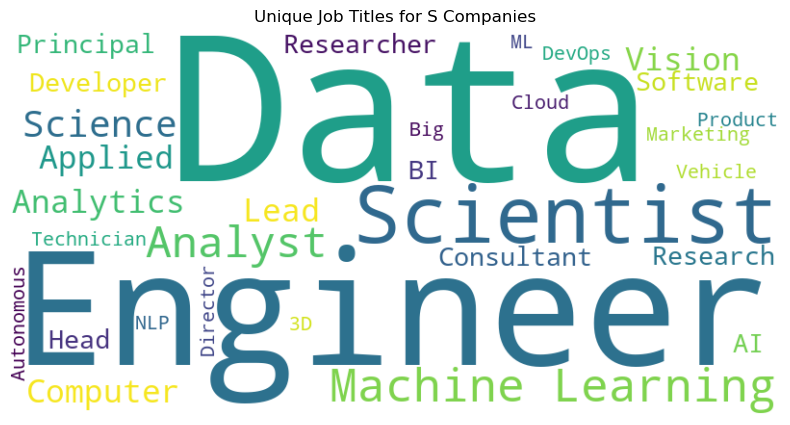

In [54]:
# Group the data by 'company_size' and aggregate the unique job titles 
company_size_unique_job_titles = df.groupby('company_size')['job_title'].agg(lambda x: ', '.join(set(x)))

# word cloud for each company size category
for company_size, titles in company_size_unique_job_titles.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Unique Job Titles for {company_size} Companies')
    plt.axis('off')
    plt.show()



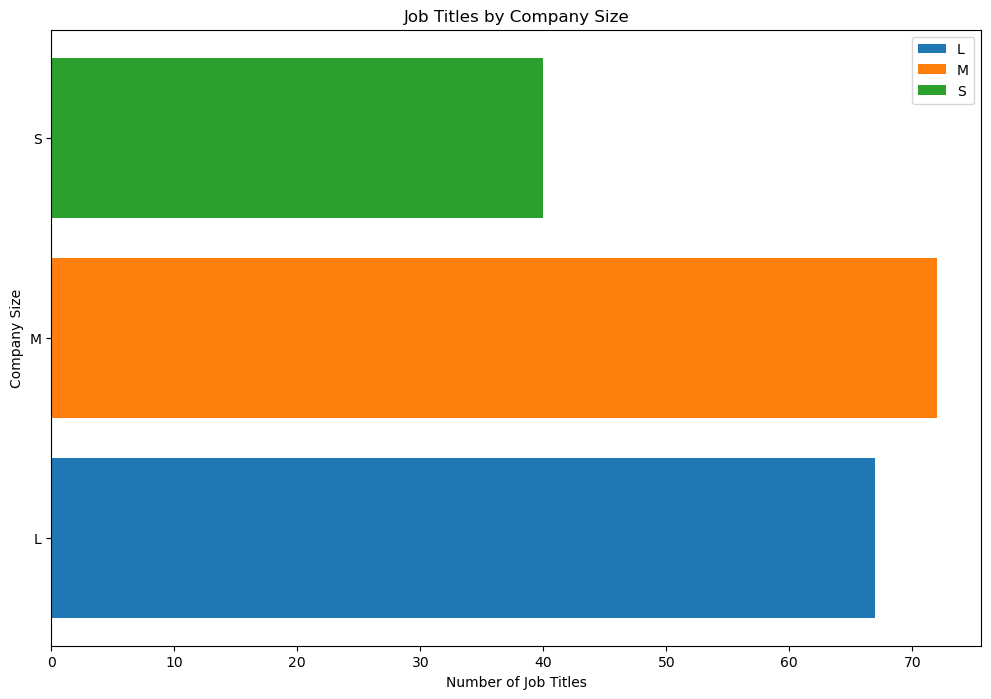

In [52]:

# Group the data by 'company_size' and collect the unique job titles for each group
company_size_job_titles = df.groupby('company_size')['job_title'].unique()

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
for company_size, job_titles in company_size_job_titles.items():
    plt.barh(company_size, len(job_titles), label=company_size)

plt.xlabel('Number of Job Titles')
plt.ylabel('Company Size')
plt.title('Job Titles by Company Size')
plt.legend()
plt.show()

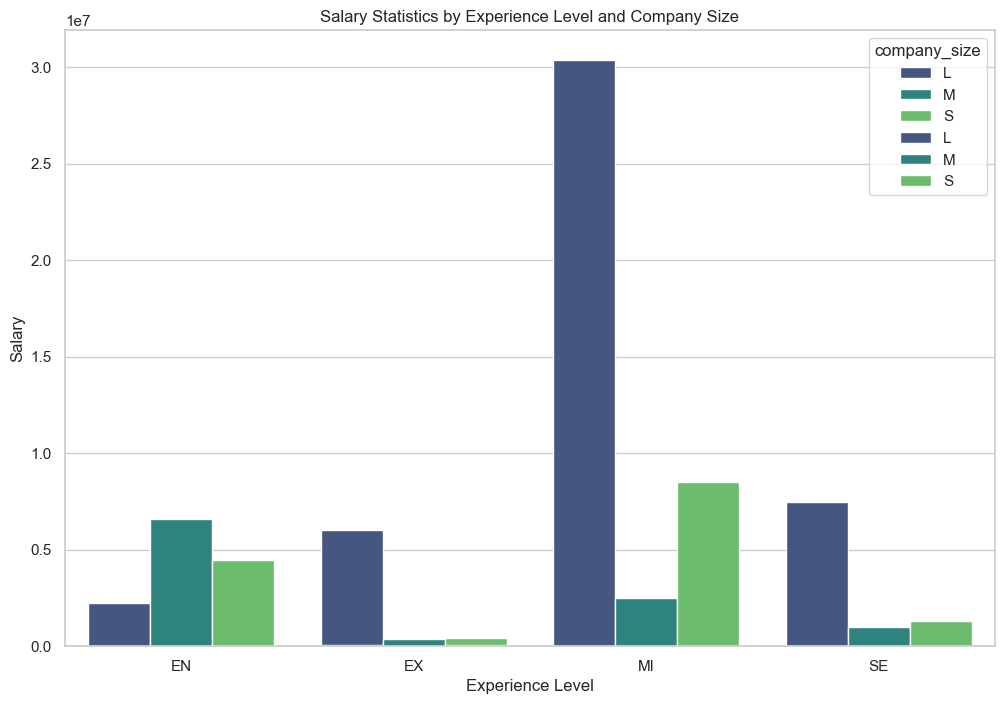

In [56]:
# Using seaborn
import seaborn as sns  # Optional, but it enhances the aesthetics

# Assuming you have already computed salary_stats
# If not, you can run the provided code to compute it

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a grouped bar chart
sns.barplot(x='experience_level', y='max', hue='company_size', data=salary_stats, ax=ax, ci=None, palette='viridis', errwidth=0)
sns.barplot(x='experience_level', y='min', hue='company_size', data=salary_stats, ax=ax, ci=None, palette='viridis', errwidth=0)

# Set labels and title
ax.set_ylabel('Salary')
ax.set_xlabel('Experience Level')
ax.set_title('Salary Statistics by Experience Level and Company Size')

# Show the plot
plt.show()


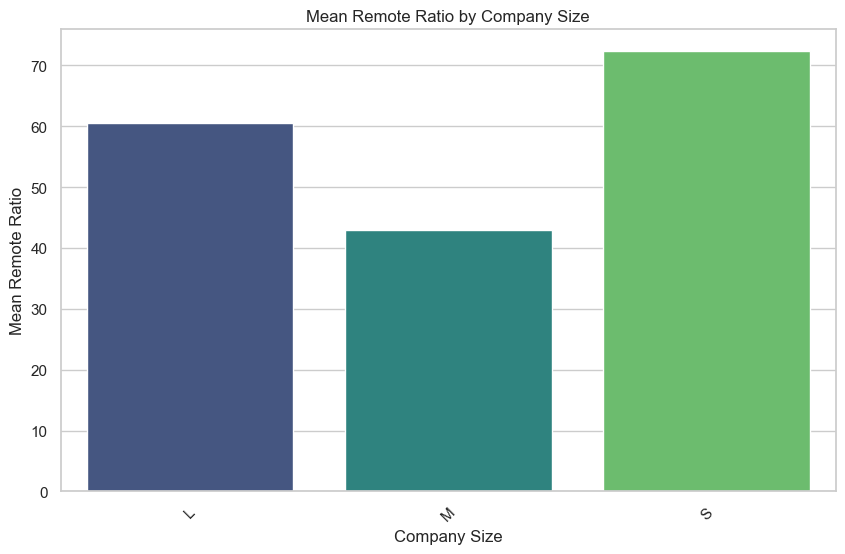

In [57]:
# Showing remote ratio through chart
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x=company_size_remote_ratio_mean.index, y=company_size_remote_ratio_mean.values, palette="viridis")

# Set labels and title
ax.set_ylabel('Mean Remote Ratio')
ax.set_xlabel('Company Size')
ax.set_title('Mean Remote Ratio by Company Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()